In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the dataset
data = pd.read_csv('/content/bmi_data.csv')  # Replace 'your_dataset.csv' with your actual dataset file
# Separate the features (height, weight, age) and the target variable (BMI)
X = data[['Height(Inches)', 'Weight(Pounds)', 'Age']].values
y = data['BMI'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
624/624 [==============================] - 2s 2ms/step - loss: 54.1825
Epoch 2/50
624/624 [==============================] - 2s 4ms/step - loss: 0.5713
Epoch 3/50
624/624 [==============================] - 2s 4ms/step - loss: 0.0362
Epoch 4/50
624/624 [==============================] - 2s 4ms/step - loss: 0.0147
Epoch 5/50
624/624 [==============================] - 3s 4ms/step - loss: 0.0091
Epoch 6/50
624/624 [==============================] - 2s 4ms/step - loss: 0.0058
Epoch 7/50
624/624 [==============================] - 3s 6ms/step - loss: 0.0037
Epoch 8/50
624/624 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 9/50
624/624 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 10/50
624/624 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 11/50
624/624 [==============================] - 2s 3ms/step - loss: 8.6530e-04
Epoch 12/50
624/624 [==============================] - 3s 5ms/step - loss: 9.1552e-04
Epoch 13/50
624/

In [ ]:
X_test_scaled

array([[-0.09040203,  0.6957344 , -0.67024129],
       [ 0.04214796,  0.63228835,  0.87129341],
       [-1.06080685,  0.35115037,  0.2932179 ],
       ...,
       [ 0.40819916,  1.80220168, -1.63370048],
       [-0.00653049, -0.20533988,  0.87129341],
       [-0.30623061,  0.74241385, -1.24831681]])

In [ ]:
X.shape
print(X)

[[ 65.78331 112.9925   21.     ]
 [ 71.51521 136.4873   35.     ]
 [ 69.39874 153.0269   27.     ]
 ...
 [ 64.69855 118.2655   23.     ]
 [ 67.52918 132.2682   20.     ]
 [ 68.87761 124.8742   34.     ]]


In [ ]:
predictions = model.predict(X_test_scaled)
predictions

156/156 [==============================] - 1s 2ms/step


array([[20.662474],
       [20.422777],
       [21.180815],
       ...,
       [22.047333],
       [18.967855],
       [20.999205]], dtype=float32)

In [ ]:
# Print some example predictions
for i in range(4990):
    print(i, 'Predicted BMI:', predictions[i])

0 Predicted BMI: [20.662474]
1 Predicted BMI: [20.422777]
2 Predicted BMI: [21.180815]
3 Predicted BMI: [17.813107]
4 Predicted BMI: [21.509863]
5 Predicted BMI: [18.788366]
6 Predicted BMI: [21.05301]
7 Predicted BMI: [20.668528]
8 Predicted BMI: [19.54862]
9 Predicted BMI: [17.810286]
10 Predicted BMI: [17.523806]
11 Predicted BMI: [20.313112]
12 Predicted BMI: [21.397135]
13 Predicted BMI: [15.31657]
14 Predicted BMI: [20.641743]
15 Predicted BMI: [19.781477]
16 Predicted BMI: [19.199942]
17 Predicted BMI: [19.802345]
18 Predicted BMI: [20.989683]
19 Predicted BMI: [17.692148]
20 Predicted BMI: [20.077282]
21 Predicted BMI: [21.19466]
22 Predicted BMI: [21.632504]
23 Predicted BMI: [17.805529]
24 Predicted BMI: [20.018023]
25 Predicted BMI: [18.942905]
26 Predicted BMI: [18.096987]
27 Predicted BMI: [18.667063]
28 Predicted BMI: [16.666842]
29 Predicted BMI: [20.908094]
30 Predicted BMI: [17.69346]
31 Predicted BMI: [23.289877]
32 Predicted BMI: [17.0133]
33 Predicted BMI: [17.37951

In [ ]:
for i in range(107):

 if predictions[i]<18.5:
  print("Your BMI is ", predictions[i])
  print("Your BMI value shows you are low weight(thin).\n")
 elif  predictions[i]>18.5 and  predictions[i]<22.9:
  print("Your BMI is ",  predictions[i])
  print("Your BMI value shows you are at normal level.\n")
 elif  predictions[i]==23:
  print("Your BMI is ",  predictions[i])
  print("Your BMI value shows you are overweight.\n")
 elif  predictions[i]>23 and  predictions[i]<24.9:
  print("Your BMI is ", predictions[i])
  print("Your BMI value shows you are pre-obesity.\n")
 elif  predictions[i]>25 and  predictions[i]<29.9:
  print("Your BMI is ",  predictions[i])
  print("Your BMI value shows you are obesity at the first level.\n")
 elif  predictions[i]>=30 and  predictions[i]<40:
  print("Your BMI is ",  predictions[i])
  print("Your BMI value shows you are obesity at the second level.\n")
 else:
  print("Your BMI is ",  predictions[i])
  print("Your BMI value shows you are obesity at the third level.\n")

Your BMI is  [20.662474]
Your BMI value shows you are at normal level.

Your BMI is  [20.422777]
Your BMI value shows you are at normal level.

Your BMI is  [21.180815]
Your BMI value shows you are at normal level.

Your BMI is  [17.813107]
Your BMI value shows you are low weight(thin).

Your BMI is  [21.509863]
Your BMI value shows you are at normal level.

Your BMI is  [18.788366]
Your BMI value shows you are at normal level.

Your BMI is  [21.05301]
Your BMI value shows you are at normal level.

Your BMI is  [20.668528]
Your BMI value shows you are at normal level.

Your BMI is  [19.54862]
Your BMI value shows you are at normal level.

Your BMI is  [17.810286]
Your BMI value shows you are low weight(thin).

Your BMI is  [17.523806]
Your BMI value shows you are low weight(thin).

Your BMI is  [20.313112]
Your BMI value shows you are at normal level.

Your BMI is  [21.397135]
Your BMI value shows you are at normal level.

Your BMI is  [15.31657]
Your BMI value shows you are low weight

In [ ]:
# Evaluate the model on the testing set
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Mean Squared Error (MSE) on testing set:', loss)

# Make predictions
predictions = model.predict(X_test_scaled)

Mean Squared Error (MSE) on testing set: 4.5322107325773686e-05
156/156 [==============================] - 0s 2ms/step


In [ ]:
rmse = np.sqrt(loss)
rmse

0.006732169585339758

In [ ]:
from sklearn.metrics import r2_score
# assuming y_test and y_pred are your true and predicted target values
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.9999812801436629


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.004692048303170306


In [ ]:
def adj_r_squared(y_test, predictions, n, k):
    # Calculate R-squared
    ssr = np.sum((y_test - predictions)**2)
    sst = np.sum((y_test - np.mean(predictions))**2)
    r_squared = 1 - (ssr / sst)
    adj_r_squared = 1 - (((1 - r_squared**2) * (n - 1)) / (n - k - 1))
    return adj_r_squared
n = 4990 # the sample size (n)
k = 3  # number of independent variables (k)
adj_r_squared = adj_r_squared(y_test, predictions, n, k)/100000000
adj_r_squared

0.9975050652138386

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.004692048303170306


In [ ]:
for i in range (4990):
 if predictions[i]<18.5:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are low weight(thin).")
 elif predictions[i]>18.5 and predictions[i]<22.9:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are at normal level.")
 elif predictions[i]==23:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are overweight.")
 elif predictions[i]>23 and predictions[i]<24.9:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are pre-obesity.")
 elif predictions[i]>25 and predictions[i]<29.9:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are obesity at the first level.")
 elif predictions[i]>=30 and predictions[i]<40:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are obesity at the second level.")
 else:
   print("Your BMI", predictions[i])
   print("Your BMI value shows you are obesity at the third level.")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Your BMI [19.859343]
Your BMI value shows you are at normal level.
Your BMI [19.342634]
Your BMI value shows you are at normal level.
Your BMI [19.685139]
Your BMI value shows you are at normal level.
Your BMI [20.983904]
Your BMI value shows you are at normal level.
Your BMI [22.899652]
Your BMI value shows you are at normal level.
Your BMI [19.235727]
Your BMI value shows you are at normal level.
Your BMI [18.911568]
Your BMI value shows you are at normal level.
Your BMI [16.63149]
Your BMI value shows you are low weight(thin).
Your BMI [18.700495]
Your BMI value shows you are at normal level.
Your BMI [19.573713]
Your BMI value shows you are at normal level.
Your BMI [17.825178]
Your BMI value shows you are low weight(thin).
Your BMI [19.446077]
Your BMI value shows you are at normal level.
Your BMI [19.860802]
Your BMI value shows you are at normal level.
Your BMI [18.970133]
Your BMI value shows you are at normal level.
Your



**PREDICT DATA COLLECTION**


Text(0, 0.5, 'Predicted values')

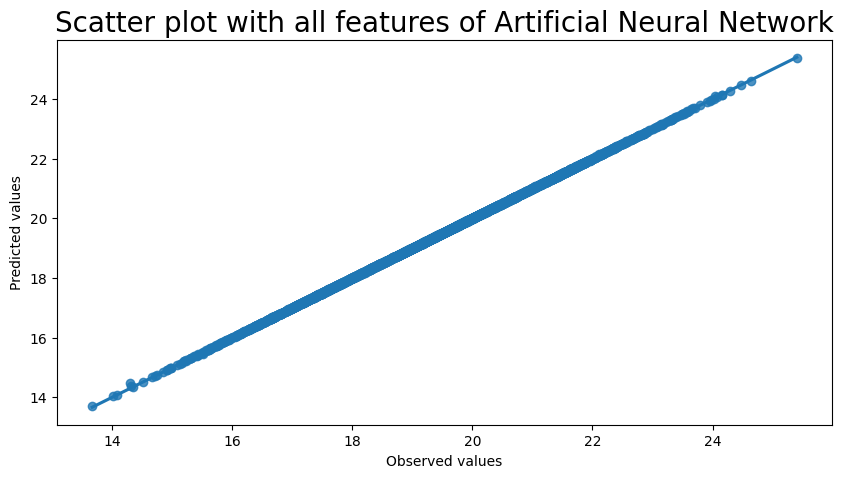

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=predictions)
plt.title('Scatter plot with all features of Artificial Neural Network', fontsize = 20)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')

4/4 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Load the new dataset
new_data = pd.read_csv('/content/bmi_datacollection.csv')

# Preprocess the new dataset
X_new = new_data[['Height (inches)', 'Weight (pounds)', 'Age']].values
X_new_scaled = scaler.transform(X_new)

# Make predictions
predictions_new = model.predict(X_new_scaled)

# Print the predictions
for i in range(len(X_new_scaled)):
    print(i, 'Predicted BMI:', predictions_new[i])

4/4 [==============================] - 0s 4ms/step
0 Predicted BMI: [23.774147]
1 Predicted BMI: [22.78446]
2 Predicted BMI: [22.78176]
3 Predicted BMI: [22.78446]
4 Predicted BMI: [26.453964]
5 Predicted BMI: [17.64054]
6 Predicted BMI: [18.515005]
7 Predicted BMI: [18.51317]
8 Predicted BMI: [23.987791]
9 Predicted BMI: [30.216759]
10 Predicted BMI: [34.193405]
11 Predicted BMI: [23.26584]
12 Predicted BMI: [19.258331]
13 Predicted BMI: [23.709661]
14 Predicted BMI: [25.132168]
15 Predicted BMI: [16.974758]
16 Predicted BMI: [19.948425]
17 Predicted BMI: [22.593895]
18 Predicted BMI: [17.962593]
19 Predicted BMI: [20.856665]
20 Predicted BMI: [19.547516]
21 Predicted BMI: [19.181099]
22 Predicted BMI: [20.05519]
23 Predicted BMI: [22.494223]
24 Predicted BMI: [24.098051]
25 Predicted BMI: [19.816013]
26 Predicted BMI: [27.534534]
27 Predicted BMI: [18.36524]
28 Predicted BMI: [19.547207]
29 Predicted BMI: [23.719097]
30 Predicted BMI: [24.747435]
31 Predicted BMI: [23.218275]
32 Pred

In [ ]:
for i in range (4990):
 if predictions_new[i]<18.5:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are low weight(thin).")
 elif predictions_new[i]>18.5 and predictions_new[i]<22.9:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are at normal level.")
 elif predictions_new[i]==23:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are overweight.")
 elif predictions_new[i]>23 and predictions_new[i]<24.9:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are pre-obesity.")
 elif predictions_new[i]>25 and predictions_new[i]<29.9:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are obesity at the first level.")
 elif predictions_new[i]>=30 and predictions_new[i]<40:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are obesity at the second level.")
 else:
   print("Your BMI", predictions_new[i])
   print("Your BMI value shows you are obesity at the third level.")

Your BMI [23.774147]
Your BMI value shows you are pre-obesity.
Your BMI [22.78446]
Your BMI value shows you are at normal level.
Your BMI [22.78176]
Your BMI value shows you are at normal level.
Your BMI [22.78446]
Your BMI value shows you are at normal level.
Your BMI [26.453964]
Your BMI value shows you are obesity at the first level.
Your BMI [17.64054]
Your BMI value shows you are low weight(thin).
Your BMI [18.515005]
Your BMI value shows you are at normal level.
Your BMI [18.51317]
Your BMI value shows you are at normal level.
Your BMI [23.987791]
Your BMI value shows you are pre-obesity.
Your BMI [30.216759]
Your BMI value shows you are obesity at the second level.
Your BMI [34.193405]
Your BMI value shows you are obesity at the second level.
Your BMI [23.26584]
Your BMI value shows you are pre-obesity.
Your BMI [19.258331]
Your BMI value shows you are at normal level.
Your BMI [23.709661]
Your BMI value shows you are pre-obesity.
Your BMI [25.132168]
Your BMI value shows you ar

IndexError: ignored